In [1]:
import os, sys, re
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# установка стиля matplotlib
%matplotlib inline
# plt.style.use('ggplot')

# доступные стили отображения графика в matplotlib
# plt.style.available

# библиотека иерархической кластеризации (для построения дендрограммы) 
# from scipy.cluster import hierarchy

# библиотека для построения выпуклой оболочки множества точек 
# from scipy import spatial

# from ydata_profiling import ProfileReport         # отключено пока не "починят"
# import sweetviz as sv
# import dtale
# import statistics as stcs
# import statsmodels.stats.proportion as stsmdls

# библиотека для расчетов корреляций
# from scipy import stats
from sklearn import metrics

# библиотека для нормализации, стандартизации
# from sklearn import preprocessing

# библиотека модели линейной регрессии
from sklearn import linear_model

# библиотека модели деревьев решения
# from sklearn import tree

# библиотека модели ансамблей
# from sklearn import ensemble

# библиотека модели кластеризации
# from sklearn import cluster

# библиотека модели эллиптической кластеризации
# from sklearn import mixture

# библиотека модели метода главных компонент PCA
# from sklearn import decomposition

# библиотека модели TSNE
# from sklearn import manifold

# библиотека clustergram-кластеризации
# from clustergram import Clustergram

# библиотека для разделения датасета
# from sklearn import model_selection

# библиотека для исключения признаков RFE
# from sklearn import feature_selection

# библиотека для кодирования признаков
# import category_encoders as ce

# для обработки timestamp в формате utc
# import datetime, time

# работа с json
# import json
# from pprint import pprint

# веб-скрэпинг сайтов
# import requests
# from bs4 import BeautifulSoup

# выводить все результаты вычислений в ячейках Code
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# подключить Latex
from IPython.display import Latex

# загрузка файлов
import wget
# import kaggle

# логгирование / логирование
# import logging

# скрытие сообщений об ошибках при обработке ответов
import warnings
# игнорируем предупреждения
warnings.filterwarnings('ignore')

# библиотека для передачи функции обратного вызова
# from functools import partial

# библиотека поиска гиперпараметров hyperopt
# import hyperopt
# from hyperopt import hp, fmin, tpe, Trials

# библиотека поиска гиперпараметров optuna
# import optuna
# from optuna import Trial, study, samplers

# библиотека для обработки символьных переменных и операций
# import sympy as sp

# импортируем подкласс для поиска области значений / определения
# from sympy.calculus import util

# изменить формат вывода pandas
# pd.set_option('display.float_format', lambda x: '%.2f' % x)
# pd.set_option('display.max_info_rows', 500)
# pd.set_option('display.max_info_columns', 500)
# pd.set_option('display.width', 1000)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.large_repr', 'truncate')

In [2]:
# КОНСТАНТЫ

# фиксация генерации воспроизведения
RANDOM_SEED = 42

# фиксируем seed для воспроизводимости решения
np.random.seed(RANDOM_SEED)

# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [3]:
url_dataset = 'https://lms-cdn.skillfactory.ru/assets/courseware/v1/be9ea3bcfb9e5ebc744c1f2af98fed61/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/Advertising.zip'
filename = './data/Advertising.csv'

# если файл есть - просто читаем с диска    
if os.path.exists(filename):
    df = pd.read_csv(filename)

# если файла нет - выгружаем, сохраняем, читаем с диска
else:
    # загружаем датасет
    df = pd.read_csv(url_dataset, compression='zip')
    
    # убираем "лишнюю" колонку с индексами
    df.drop(columns='Unnamed: 0', inplace=True)
    
    # создаём подкаталог для записи датасета
    if os.path.exists('data') == False:
        os.mkdir('data')

    # записываем датасет
    df.to_csv('./data/Advertising.csv', index=False)

    # читаем предварительно "подготовленный" датасет из каталога
    df = pd.read_csv('./data/Advertising.csv')

In [4]:
df.head()
df.describe()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [7]:
def get_arrays(
        df_:pd.DataFrame=df
    ) -> np.ndarray:
    """ Функция, реализующая разделение признаков на массив наблюдений и вектор целевых значений

    Args:
        df_ (pd.DataFrame, optional):   исходный датасет для обработки. 
                                        Defaults to df.

    Returns:
        X_ (np.ndarray): матрица наблюдений (предикторы)
        
        y_ (np.ndarray): вектор целевых значений (таргет)
    """
    
    # формируем переменные типа ndarray
    X_ = df_.iloc[:, :3].values
    y_ = df_.iloc[:, 3].values.reshape(-1, 1)

    return X_, y_

In [8]:
# выполняем преобразование и разделение признаков
X, y = get_arrays()

# выводим результаты
X.shape, y.shape

((200, 3), (200, 1))

## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [9]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])
print(X.shape, y.shape)

(200, 4) (200, 1)


In [10]:
# выводим результаты
X[:5]
y[:5]

array([[  1. , 230.1,  37.8,  69.2],
       [  1. ,  44.5,  39.3,  45.1],
       [  1. ,  17.2,  45.9,  69.3],
       [  1. , 151.5,  41.3,  58.5],
       [  1. , 180.8,  10.8,  58.4]])

array([[22.1],
       [10.4],
       [ 9.3],
       [18.5],
       [12.9]])

**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [11]:
X = X / np.sqrt(np.sum(np.square(X), axis=0))

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм координатного спуска для случая нормализованных данных:

**Задано:**

* $X=(x_{ij})$ - матрица наблюдений, размерностью $dim(X)=(n, m)$
* $N=1000$ - количество итераций

**Примечание:** *1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.*

**Алгоритм (математическая запись):**
* Создать нулевой вектор параметров $w_0=(0, 0,..., 0)^T$
* Для всех $t=1, 2, ..., N$ итераций:
    * Для всех $k = 1, 2,..., m$:
        * Фиксируем значение всех признаков, кроме $k$-ого и вычисляем прогноз модели линейной регрессии.Для этого исключаем признак $k$-ый из данных и $w_j$ из параметров при построении прогноза.
        Математически это можно записать следующим образом:

        $$h_i = \sum_{j=1}^{k-1} x_{ij}w_{j} + \sum_{j=k+1}^{m} x_{ij}w_j $$

        **Примечание:**
        
        *Обратите, что в данной записи текущий признак под номером $k$ не участвует в сумме.Сравните эту запись с классической записью прогноза линейной регрессии в случае нормированных данных (когда участвуют все признаки):*

        $$h_i = \sum_{j=1}^{m} x_{ij}w_{j}$$ 
        
        * Вычисляем новое значение параметра $k$-ого коэффициента: 
        $$w_k = \sum_{i=1}^{n} x_{ik} (y_i - h_i) = x_k^T(y-h) $$

    * Вычисляем значение функции потерь и сохраняем в историю изменения функции потерь (В оценке функции потерь участвуют все признаки):
        $$\hat{y_i} = \sum_{j=1}^{m}x_{ij}w_j$$
        $$Loss_t = \frac{1}{n} \sum_{i=1}^{n}(y_i-\hat{y_i})^2$$
        
        или в векторном виде:
        
        $$\hat{y} = Xw$$
        $$Loss_t = \frac{1}{n}(y-\hat{y})^T(y-\hat{y})$$
    



**Алгоритм (псевдокод):**
```python

num_iters = #количество итераций
m = # количество строк в матрице X
n = # количество столбцов в матрице X
w = #вектор размера nx1, состояющий из нулей

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum((X @ w) - y) ** 2)/(len(y))

```

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [12]:
# задаём количество столбцов в матрице X
m = X.shape[1]

# задаём количество строк в матрице X
n = X.shape[0]

# задаём пустой вектор коэффициентов
w = np.zeros(m).reshape(-1, 1)

def coordinate_descent(
        X_:np.ndarray=X, y_:np.ndarray=y, 
        w_:np.ndarray=w, 
        num_iters_:int=1000
    ) -> np.ndarray | float:
    """ Функция, реализующая вычисление вектора коэффициентов методом координатного спуска.

    Args:
        X_ (np.ndarray): матрица наблюдений (предикторы). Defaults to X.
        
        y_ (np.ndarray): вектор целевых значений (таргет). Defaults to y.
        
        w_ (np.ndarray): пустой вектор коэффициентов. Defaults to w.
        
        num_iters_ (int, optional): количество итераций. Defaults to 1000.

    Returns:
        w_ (np.ndarray): вектор вычисленных коэффициентов
        
        mse_ (float): значение метрики MSE (функция потерь)
        
        mae_ (float): значение метрики MAE
    """

    # начальные значения метрик
    mse_, mae_  = [], []

    for _ in range(num_iters_):
        for k in range(m):
            # вычисляем прогноз без k-ого фактора
            h = (X_[:, 0:k] @ w[0:k]) + (X_[:, k + 1:] @ w[k + 1:])
            
            # вычисляем новое значение k-ого коэффициента
            w_[k] = (X_[:, k].T @ (y_ - h))
            
            # вычисляем метрику MSE
            mse_ = np.sum((y_ - (X_ @ w))**2) / (len(y_))
            
            # вычисляем метрику MAE
            mae_ = np.sum(abs(y_ - (X_ @ w))) / (len(y_))
    
    return w_, mse_, mae_

In [13]:
# выполняем алгоритм координатного спуска, получаем результаты
w_coord_desc, mse, mae = coordinate_descent(X, y, w)

# выводим результаты, разворачиваем вектор w_coord_desc горизонтально
print(f'Коэффициенты линейной регрессии:\n{w_coord_desc.flatten()}')
print(f'Метрика MSE: {mse:.8f}')
print(f'Метрика MAE: {mae:.8f}')

Коэффициенты линейной регрессии:
[ 41.56217205 110.13144155  73.52860638  -0.55006384]
Метрика MSE: 2.78412631
Метрика MAE: 1.25201123


Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [14]:
# создаём и обучаем модель линейной регрессии
LR = linear_model.LinearRegression(fit_intercept=False)
LR.fit(X, y)

# выполняем предсказание значений
y_pred_LR = LR.predict(X)

# выводим результаты
print(f'Коэффициенты модели линейной регрессии:\n{LR.coef_}')
print(f'Метрика MSE {LR.__class__.__name__}: '\
    f'{metrics.mean_squared_error(y, y_pred_LR):.8f}')
print(f'Метрика MAE {LR.__class__.__name__}: '\
    f'{metrics.mean_absolute_error(y, y_pred_LR):.8f}')

LinearRegression(fit_intercept=False)

Коэффициенты модели линейной регрессии:
[[ 41.56217205 110.13144155  73.52860638  -0.55006384]]
Метрика MSE LinearRegression: 2.78412631
Метрика MAE LinearRegression: 1.25201123


Если вы все сделали верно, они должны практически совпасть!

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [15]:
# выполняем преобразование и разделение признаков
X, y = get_arrays()

# выполняем стандартизацию матрицы наблюдений
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

**Добавим единичный столбец**

In [16]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

# выводим результаты
print(X.shape, y.shape)
X[:5]
y[:5]

(200, 4) (200, 1)


array([[ 1.        ,  0.96985227,  0.98152247,  1.77894547],
       [ 1.        , -1.19737623,  1.08280781,  0.66957876],
       [ 1.        , -1.51615499,  1.52846331,  1.78354865],
       [ 1.        ,  0.05204968,  1.21785493,  1.28640506],
       [ 1.        ,  0.3941822 , -0.84161366,  1.28180188]])

array([[22.1],
       [10.4],
       [ 9.3],
       [18.5],
       [12.9]])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [17]:
def mse_error(
        y_:np.ndarray, 
        y_pred_:np.ndarray
    ) -> float:
    """ Функция, реализующая вычисление среднеквадратичной ошибки. 

    Args:
        y_ (np.ndarray): вектор целевых значений (таргет)
        
        y_pred_ (np.ndarray): вектор предсказанных целевых значений

    Returns:
        (float): значение среднеквадратичной ошибки
    """

    return np.sum((y_ - y_pred_)**2) / len(y)

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [18]:
# прогноз средним значением
y_pred_naive = np.full(y.shape, y.mean())

# выводим результаты
print(f'Метрика MSE для наивного прогноза: {mse_error(y, y_pred_naive):.8f}')

Метрика MSE для наивного прогноза: 27.08574375


In [19]:
# проверяем полученный результат для среднеквадратичной ошибки с помощью sklearn
metrics.mean_squared_error(y, y_pred_naive)

27.085743750000002

**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [20]:
def lin_pred(
        X_:np.ndarray, 
        w_:np.ndarray
    ) -> np.ndarray:
    """ Функция, реализующая вектор прогнозов

    Args:
        X_ (np.ndarray): матрица наблюдений (предикторы)

        w_ (np.ndarray): вектор весов линейной модели

    Returns:
        (np.ndarray): вектор прогнозов
    """

    # преобразуем вектор в одномерный массив
    w_ = w_.reshape(-1, 1)
    
    # получаем вектор прогнозов линейной модели, 
    # преобразуем в одномерный массив
    return (X_ @ w_).reshape(-1, 1)

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [21]:
def stoch_grad_step(
        X_:np.ndarray, 
        y_:np.ndarray, 
        w_:np.ndarray, 
        train_ind:int, 
        eta:float
    ) -> np.ndarray:
    """ Функция, реализующая шаг стохастического градиентного спуска

    Args:
        X_ (np.ndarray): матрица наблюдений (предикторы)

        y_ (np.ndarray): вектор целевых значений (таргет)
        
        w_ (np.ndarray): вектор весов линейной модели
        
        train_ind (int):    индекс объекта обучающей выборки (строки матрицы X), 
                            по которому считается изменение весов

        eta (float): шаг градиентного спуска

    Returns:
        (np.ndarray): обновленный вектор весов линейной модели
    """

    # вычисляем разницу между предсказанным и реальным значением
    diff = lin_pred(X_[train_ind], w_) - y_[train_ind]

    # вычисляем направление изменения весов модели
    direction = X_[train_ind, :] * 2 * diff / len(y_)
    
    # обновляем веса (коэффициенты) модели
    return  w_ - direction * eta

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [22]:
# создадим функцию для реализации стохастического градиентного спуска
def stochastic_gradient_descent(
        X_:np.ndarray=X, 
        y_:np.ndarray=y, 
        w_init:np.ndarray=w, 
        eta:float=0.01, 
        max_iter:int=1e5, 
        min_weight_dist:float=1e-8
    ) -> np.ndarray | list[float]:
    """_summary_

    Args:
        X_ (np.ndarray, optional): матрица наблюдений (предикторы). Defaults to X.
        
        y_ (np.ndarray, optional): вектор целевых значений (таргет). Defaults to y.
        
        w_init (np.ndarray, optional): пустой вектор коэффициентов. Defaults to w.
        
        eta (float, optional): темп обучения. Defaults to 0.01.
        
        max_iter (int, optional): максимальное число итераций. Defaults to 1e5.
        
        min_weight_dist (float, optional):  между векторами весов на соседних итерациях градиентного спуска, 
                                            при котором алгоритм прекращает работу. Defaults to 1e-8.

    Returns:
        w (np.ndarray): веса (коэффициенты) линейной модели
        
        errors (list[float]): список значений среднеквадратичных ошибок
    """
    
    # задаём расстояние между векторами весов бесконечностью
    weight_dist = np.inf

    # создаём пустой список для фиксации ошибок
    errors = []

    # создаём счетчик итераций
    iter_num = 0

    # задаём начальный вектор весов
    w = w_init

    # выполняем цикл пока расстояние между векторами весов больше того,
    # при котором будет прекращена работа и количество итераций меньше максимума
    while weight_dist > min_weight_dist and iter_num < max_iter:
        # задаём случайный индекс
        random_index = np.random.randint(len(y))

        # записываем в переменную текущий шаг стохастического спуска
        w_new = stoch_grad_step(X_, y_, w, random_index, eta)

        # вычисляем текущее расстояние между векторами весов
        weight_dist = np.linalg.norm(w - w_new)

        # записываем среднеквадратичную ошибку предсказания
        errors.append(mse_error(y, lin_pred(X, w)))

        # обновляем вектор весов и индекс итерации
        w = w_new
        iter_num += 1

    return w, errors

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

In [23]:
# задаем нулевой вектор коэффициентов (весов модели)
w = np.zeros(4)

# выполняем алгоритм стохастического градиентного спуска, получаем результаты
w_stoch_grad_desc, errors = stochastic_gradient_descent(X, y, w)

In [24]:
print(f'Количество итераций: {len(errors)}')

Количество итераций: 84501


**Постройте график зависимости ошибки от номера итерации**

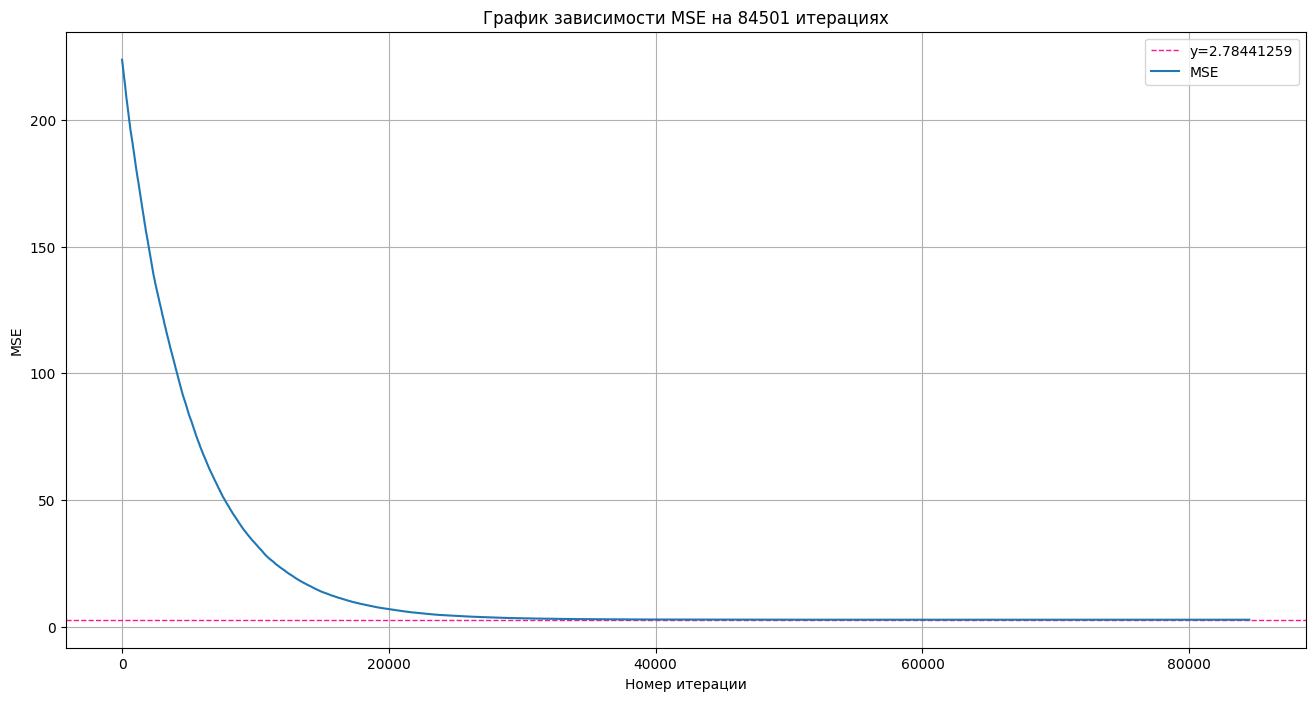

In [25]:
# задаём размер полотна
fig = plt.figure(figsize=(16, 8))
plt.grid()

# рисуем график уровня последнего значения MSE
plt.axhline(errors[-1], lw=1, c='deeppink', linestyle='--', label=f'y={errors[-1]:.8f}')

# рисуем график MSE
plt.plot(errors, label='MSE')

# задаём отображение легенды
plt.legend()

# задаём заголовок и подписи осей
plt.title(f'График зависимости MSE на {len(errors)} итерациях')
plt.ylabel('MSE')
plt.xlabel('Номер итерации');

**Выведите вектор весов, к которому сошелся метод.**

In [26]:
w_stoch_grad_desc

array([[ 1.40190566e+01,  3.91069256e+00,  2.78209808e+00,
        -8.10462217e-03]])

**Выведите среднеквадратичную ошибку на последней итерации.**

In [27]:
print(f'MSE на последней итерации: {errors[-1]:.8f}')

MSE на последней итерации: 2.78441259


In [28]:
# выводим результаты метрики MSE и MAE на всех данных
print(f'Метрика MSE: {metrics.mean_squared_error(y, lin_pred(X, w_stoch_grad_desc)):.8f}')
print(f'Метрика MAE: {metrics.mean_absolute_error(y, lin_pred(X, w_stoch_grad_desc)):.8f}')

Метрика MSE: 2.78441259
Метрика MAE: 1.25362502


---

## **Выводы**:

* Решение, полученное при самостоятельной реализации координатного спуска для линейной регрессии, совпадает с реализацией линейной регрессии с библиотекой *sklearn*;

* Наивный прогноз дает результат в 10 раз хуже;

* Стохастический градиентный спуск быстрее минимизирует ошибку, за меньшее количество итераций, чем 1e5 на 15%;

* Метрики MSE и MAE совпадают до 2-го знака после запятой включительно, коэффициенты вектора весов отличны друг от друга;

* Оба алгоритма (ручные - координатный и стохастический градиентный и из библиотеки *sklearn*) сошлись на одном уровне - об этом говорят одинаковые метрики MSE, но в разных точках пространства - об этом говорят разные вектора весов.